# Fetching Data
Fetching MINST dataset and plotting the first image.


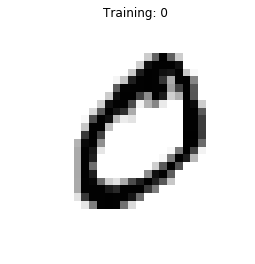

In [1]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# Dataset downloader
from sklearn.datasets import fetch_mldata
# Working with datastructures such as matrix
import numpy as np
# Plot in python
import matplotlib.pyplot as plt
# Dirac delta for misclassification rate
from sympy.functions.special.delta_functions import DiracDelta
# plot the random forest
from sklearn.tree import export_graphviz
from subprocess import check_call
import pydot
import pydot_ng
from subprocess import check_call




# fetching MNIST dataset with fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="/Users/elihei/programming/Practical Machine Learning/data/MNIST")

# reshape images to 28 * 28 in order to plot
images = [x.reshape(28,28) for x in mnist.data]
labels = mnist.target

# plotting the first image
plt.axis('off')
plt.imshow(images[0], cmap=plt.cm.gray_r)
plt.title('Training: %i' % labels[0])
plt.show()
plt.close()
images = mnist.data

# making (label, features) --> each pixel is a feature so we have 784 features for each sample
# half of the data is used for training and half will be used for testing.
indice = np.random.choice(len(images), len(images)//2, replace=False) # random choice of half of the indices --> to be unbiased!
training_images = images[indice]
training_labels = labels[indice]
test_images = images[[x for x in range(0,len(images)) if x not in indice]]
test_labels = labels[[x for x in range(0,len(images)) if x not in indice]]
# making classes 
map(int, training_labels)
training_size = len(training_images)

# ATTENTION! the data should be in a 2d array format. Each image is a row and
# all of the images should compose a 2d array.


# Random Forest Classifier
RandomForestClassifier function has been used to set the parameteres.
- The function "misclass" gets the max depth of the trees of the forest and returns the misclassification rate for 10-fold cross-validation.
- The funciton opt_param finds the optimal depth of the trees by a grid search. (optimal depth was 190 for a grid serach between 10 and 200 by step of length 10)
- The first classifer tree fitted on the training data has been plotted and the plot is saved in tree0.png.
- In order to find the best number of classifiers for this problem the out-of-bag error among the number of trees has been plotted. (optimal number of trees was 


/usr/local/lib/python3.6/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


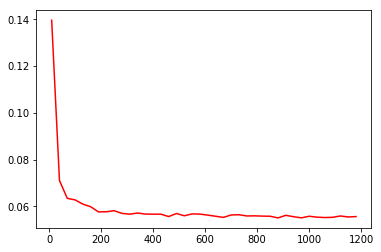

In [2]:
# Fits a random forest to the training data with maximum depth of m_depth and returns 
# the misclassification rate for 10-fold cross-validation
def misclass(m_depth):
    # Define Random Forest Classifier by setting the parameters
    # n_estimators : number of random trees
    # criterion : mesearement of feature importance 
    # max_depth : maximum depth of trees in the forest
    # min_samples_split : minimum number of samples in a split
    # min_samples_leaf : minimum number of samples in a leaf
    # min_weight_fraction_leaf : minimum weight of samples to be a leaf
    # n_jobs : number of cores dedicated
    # bootstrap : whether to use bootstrap for sampling or not
    # oob_score : whether to calculate out of box score or not
    # max_fetures : maximum fetures used for classification at each split
    # max_leaf_nodes : maximum number of leaf nodes
    # min_impurity_split : if the impurity of a node is more than this the node can be splited.
    # min_impurity_decrease : if the impurity of the nodes resulted from spliting a node is more than this the node can be splited.
    # warm_start : Whether to use previous model and add new estimators
    # random_state : seed of the random generator
    # verbose : ?
    
    # setting the parameters of the classifier
    rfclassifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=m_depth, min_samples_split=2, min_samples_leaf=20,\
                           min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None,\
                           min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False,\
                           n_jobs=3, random_state=None, verbose=0, warm_start=False)
    mis_rate = 0
    # the following is a 10-fold cross-validation
    for x in range(0,10):
        min_ind = x * training_size // 10
        max_ind = (x + 1) * training_size // 10
        # validation data
        vd_img = training_images[min_ind:max_ind]
        vd_lab = training_labels[min_ind:]
        # training data
        tr_img = np.concatenate((training_images[:min_ind] , training_images[max_ind:]), axis = 0)
        tr_lab = np.concatenate((training_labels[:min_ind], training_labels[max_ind:]), axis = 0)
        # fitting the model to training data
        rfclassifier.fit(tr_img, tr_lab)
        # predicting the labels of validation data
        predicitons = rfclassifier.predict(vd_img)
        # computing misclassificaitons of validation data
        misclassifications = [(p_i - l_i == 0) for p_i, l_i in zip(predicitons, vd_lab)]
        mis_rate += sum(misclassifications) / 3500
    return 1- mis_rate / 10

# optimizer finder employing grid search between mini and maxi with grid width of step
def opt_param(mini, maxi, step):
    opt = 1
    for x in range(mini, maxi, step):
        if opt > misclass(x):
            opt = misclass(x)
            optx = x
    return optx

# fits a classifier with n_est trees to the training data
def rfclf(n_est):
    # A classifier description --> oob_score = True for future use in plotting
    clf = RandomForestClassifier(n_estimators=n_est, criterion='gini', max_depth= 190, min_samples_split=2, min_samples_leaf=20,\
                               min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None,\
                               min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=True,\
                               n_jobs=3, random_state=None, verbose=0, warm_start=True)

    # Fitting the defined classifier
    clf.fit(training_images, training_labels)
    return clf
    
rf_clf = rfclf(100)

# plotting the first classifier tree
tree = rf_clf.estimators_[0]
export_graphviz(tree,
            filled=True,
            rounded=True)
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree0.png')

# plotting out-of-bag error for different number of trees
oob_errors = []
for n in range(10, 1210,30):
    rf_clf = rfclf(n)
    oob_errors.append(1 - rf_clf.oob_score_)   
plt.plot(range(10, 1210,30), oob_errors, 'r')
plt.show()  

# Took about 30 mins on core i5 intel --> best number of trees =? 500 (best performance without overhead)



# Gradient Boosting


In [ ]:
# fits a classifier with n_est trees to the training data
def gbclf(n_est):
    # Defining a Gradient Boosting Classifier (many of parameters are the same as of RF classifier)
    # loss : Gradient Boosting (deviance) or Adaboost (exponential)
    # learning rate : rate of decrease in weight of residual fitted tree
    # subsample : fraction of data to be used if < 1 --> stochastic gradient descent
    # criterion :  “friedman_mse” for the mean squared error with improvement score by Friedman, “mse” for mean squared error, and “mae” for the mean absolute error. best is friedman!
    # init : ?
    # presort : whether to presort data in order to speedup the alg. best is auto!
    clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=n_est,\
                                       subsample=1.0, criterion='friedman_mse',\
                                       min_samples_split=2, min_samples_leaf=1,\
                                       min_weight_fraction_leaf=0.0, max_depth=3,\
                                       min_impurity_decrease=0.0, min_impurity_split=None,\
                                       init=None, random_state=None, max_features=None,\
                                       verbose=0, max_leaf_nodes=None, warm_start=False,\
                                       presort='auto')
    # Fitting the model
    clf.fit(training_images, training_labels)
    return clf

# Comparing the methods
Now we want to compare the methods in terms of misclassifications of test data. 

In [ ]:
# misclassification rate of Random Forest Classifier
rf_mis_rate = []
# misclassification rate of Gradient Boosting Classifier
gb_mis_rate = []
# between 10 and 1200 trees
for n in range(10, 1210,30):
    
    rf_clf = rfclf(n)
    rf_pred = rf_clf.predict(test_images)
    rf_mis = [(p_i - l_i == 0) for p_i, l_i in zip(rf_pred, test_labels)]
    rf_mis_rate.append(sum(rf_mis) / 3500)
    
    gb_clf = gbclf(n)
    gb_pred = gb_clf.predict(test_images)
    gb_mis = [(p_i - l_i == 0) for p_i, l_i in zip(gb_pred, test_labels)]
    gb_mis_rate.append(sum(gb_mis) / 3500)
    
plt.plot(range(10, 1210,30), rf_mis_rate , 'b', range(10, 1210,30), gb_mis_rate, 'r')
plt.show()

# took more than a hour!!!


/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
